# Data Exploration of Emotion Recognition Dataset
This notebook explores the emotion recognition dataset, providing insights into label distribution, text length, and basic text features.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 8)

## 1. Load Emotion Recognition Data
Located at: `../data/training.csv`, `../data/validation.csv`, `../data/test.csv`

In [2]:
train_df = pd.read_csv('../data/training.csv')
val_df = pd.read_csv('../data/validation.csv')
test_df = pd.read_csv('../data/test.csv')
print('Train:', train_df.shape, 'Validation:', val_df.shape, 'Test:', test_df.shape)
train_df.head()

Train: (16000, 2) Validation: (2000, 2) Test: (2000, 2)


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


### Dataset Overview

In [3]:
print('Train columns:', train_df.columns.tolist())
print('Missing values:', train_df.isnull().sum().to_dict())
print('Label value counts:', train_df['label'].value_counts().to_dict())

Train columns: ['text', 'label']
Missing values: {'text': 0, 'label': 0}
Label value counts: {1: 5362, 0: 4666, 3: 2159, 4: 1937, 2: 1304, 5: 572}


### Emotion Label Distribution

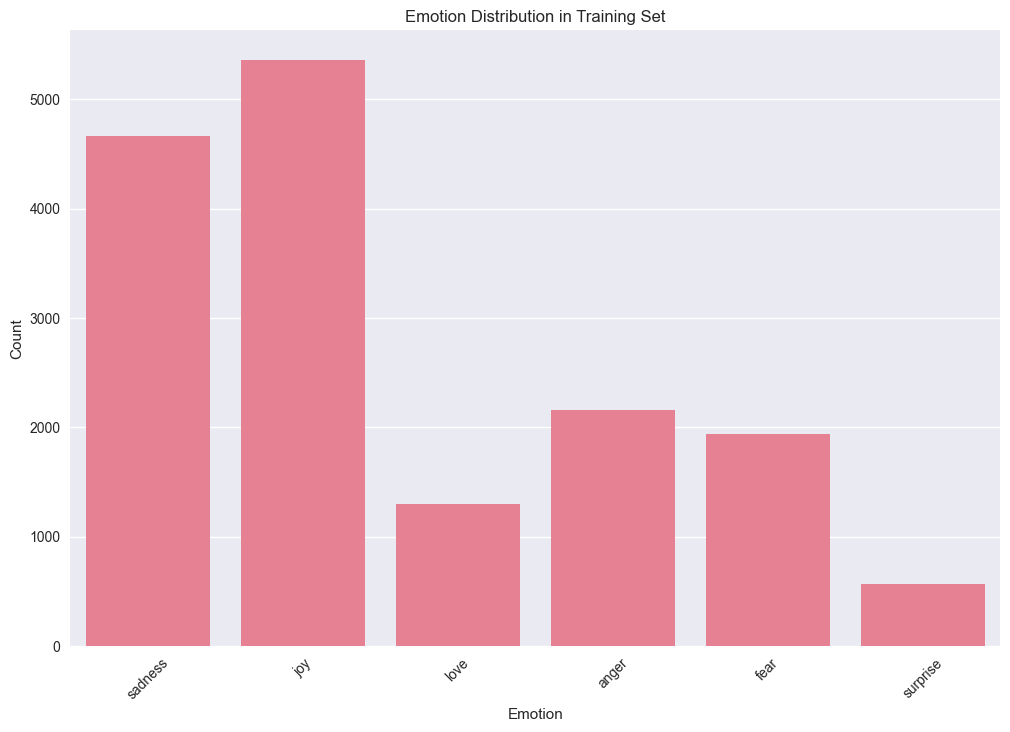

In [4]:
label_map = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}
train_df['emotion'] = train_df['label'].map(label_map)
sns.countplot(data=train_df, x='emotion', order=list(label_map.values()))
plt.title('Emotion Distribution in Training Set')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Text Length Analysis

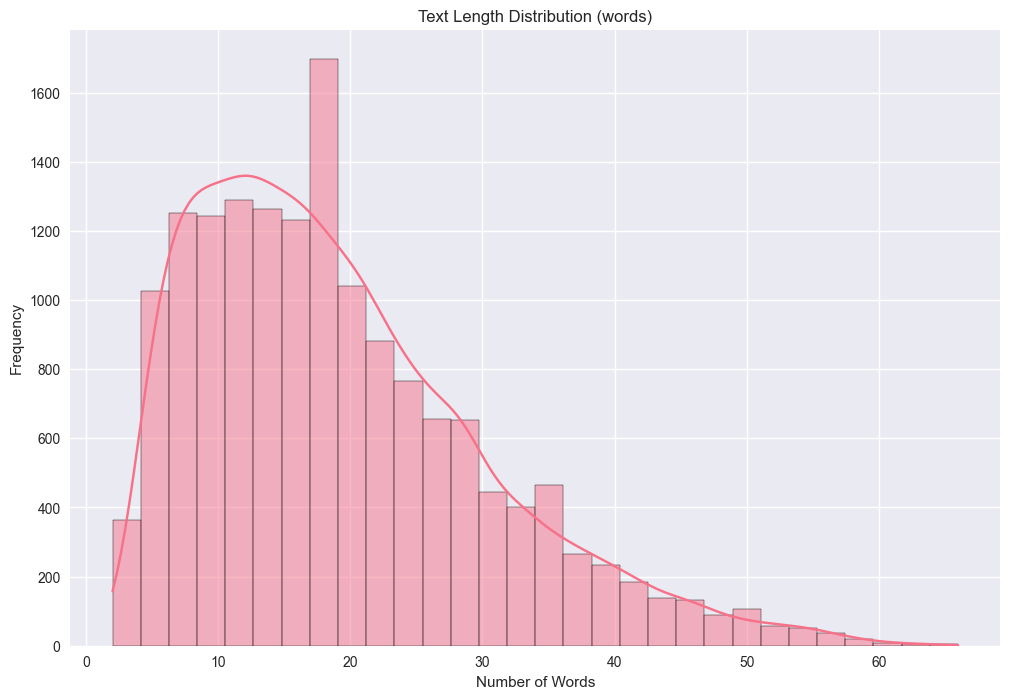

In [5]:
train_df['text_length'] = train_df['text'].apply(lambda x: len(str(x).split()))
sns.histplot(train_df['text_length'], bins=30, kde=True)
plt.title('Text Length Distribution (words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

### Word Cloud for Each Emotion

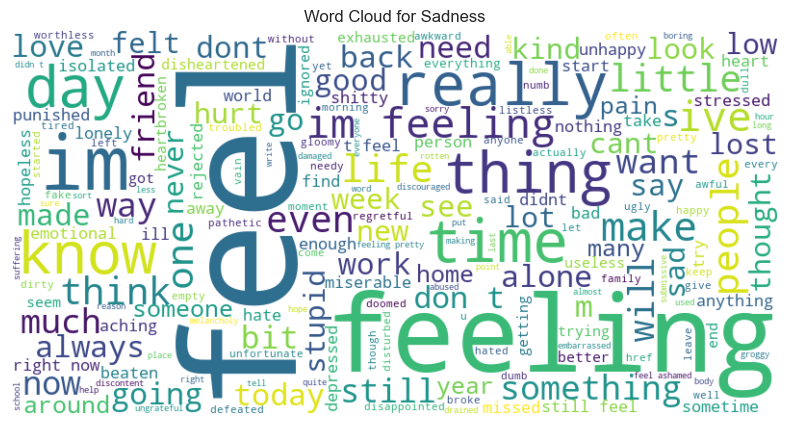

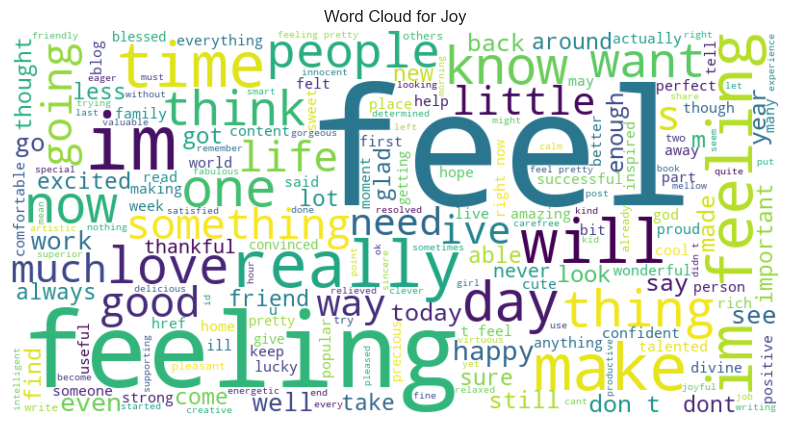

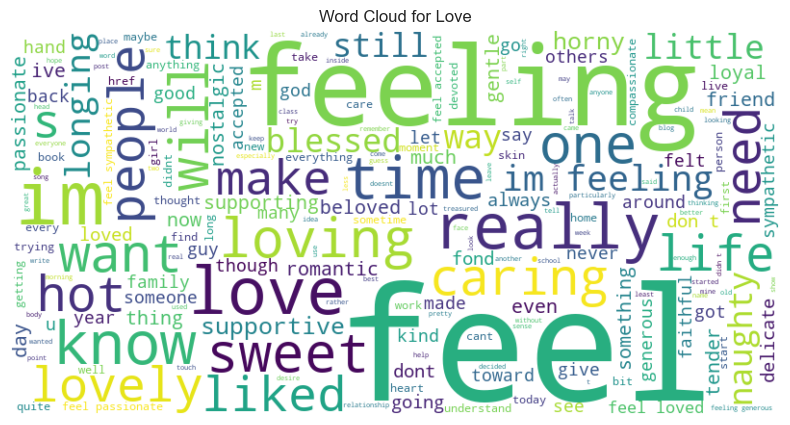

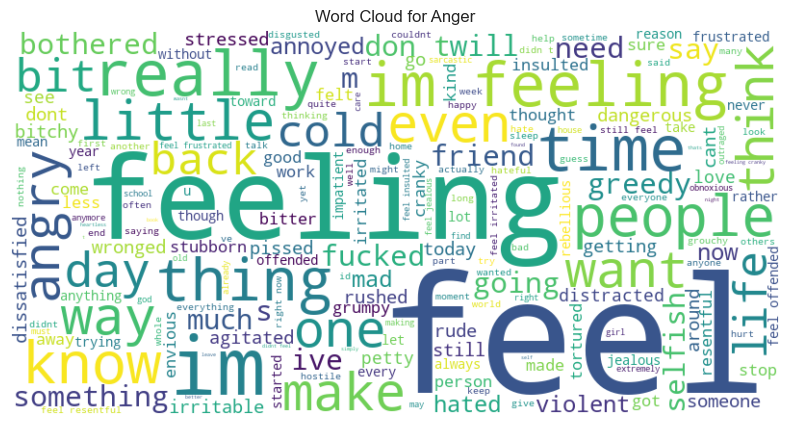

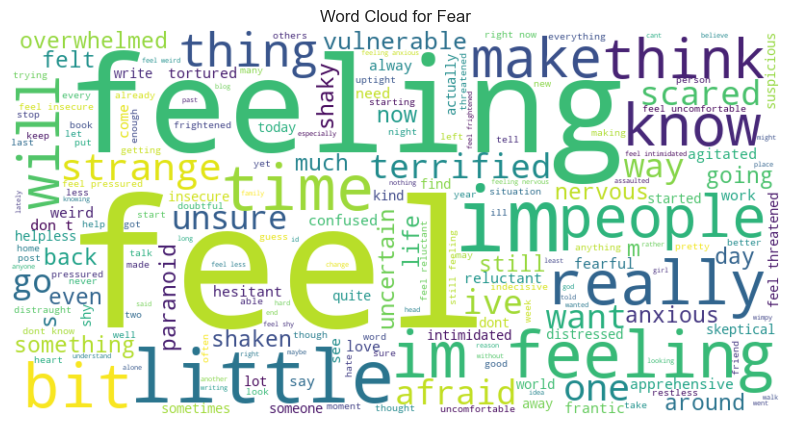

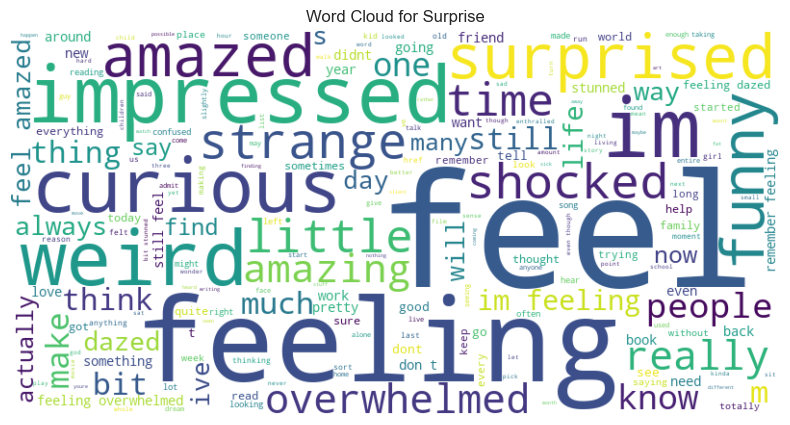

In [6]:
for label, emotion in label_map.items():
    text = ' '.join(train_df[train_df['label'] == label]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {emotion.capitalize()}')
    plt.show()